In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from scipy.special import factorial
%matplotlib ipympl
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import math
prob =0.7
-math.log(1-prob)/math.log(10)
0.5*math.log(10)

7.3890560989306495

In [2]:
from scipy.stats import nbinom
from collections import Counter
def histoAndFitPoisson(dt, bins = 100):
    plt.clf()
    fig, ax1 = plt.subplots()
    mean=np.mean(dt)
    std=np.std(dt)
    p=mean/pow(std,2)
    n=pow(mean,2)/(pow(std,2)-mean)
    print(mean, std, p, n)
    x = np.arange(np.min(dt), np.max(dt))
#     x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p))
    # negative binomial distribution
#     p=1-mean/std
#     n=mean*(1-p)/p
    y = nbinom.pmf(x, n = n, p = p) # pmf
    
#     y = nbinom.cdf(x, n = n, p = p) # cumulative
#     y = nbinom.sf(x, n = n, p = p) # survival = 1- cumulative

    # plotting the graph
    ax1.plot(x, y, 'bs')
#     for k in k_vals:
#         print(str(k) + " -> " + str(poisson.logsf(k, mu=mean)))
    print("90% @ " + str(nbinom.ppf(.9, n = n, p = p)) + " count")
    print("95% @ " + str(nbinom.ppf(.95, n = n, p = p)) + " count")
#     print(probs)
#     ax1.plot(k_vals, probs, 'bs')
    ax1.set_ylabel("Cum Neg Binom")

    ax2 = ax1.twinx() 
    N = bins
    #binwidth
    bw = (dt.max()-dt.min())/(N-1.)
    bin1 = dt.min()+ bw*np.arange(N)
    #define the array to hold the occurrence count
    bincount= np.array([])
    for bin in bin1:
        count = np.where((dt>=bin)&(dt<bin+bw))[0].size
        bincount = np.append(bincount,count)
    #bin center
    binc = bin1+0.5*bw
    ax2.plot(binc, bincount, drawstyle= 'steps-mid')
    ax2.set_xlabel("Interval[ticks]")
    ax2.set_ylabel("Frequency")
#     fig.tight_layout()
    plt.show()
    
def getNumberOfPermutationsFromString(group):
    counter = Counter(group)
    tmp = 1
    for c in counter:
        tmp = tmp * factorial(counter[c])
    return int(factorial(len(group))/tmp)

In [3]:
folder="/data/bls/motifcounts/l8-9_a3_d3_rescaled.parquet/"
group = "AAAMNNTT"
# group = "CCCCCCGG"
data = pd.read_csv(folder + group + ".group", sep='\t', header=None)
perms = getNumberOfPermutationsFromString(group)
dt = np.zeros(perms - data.shape[0])
dt = np.concatenate([dt, np.array(data[8])])

20671.09642857143 990.1800330467121 0.02108313471736736 445.1976732809025
90% @ 21950.0 count
95% @ 22326.0 count


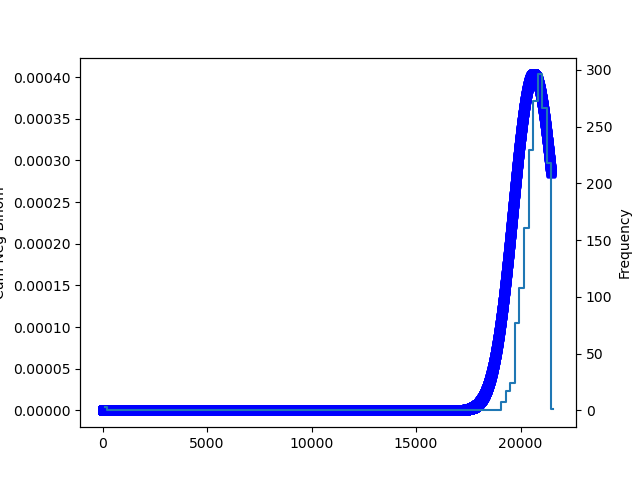

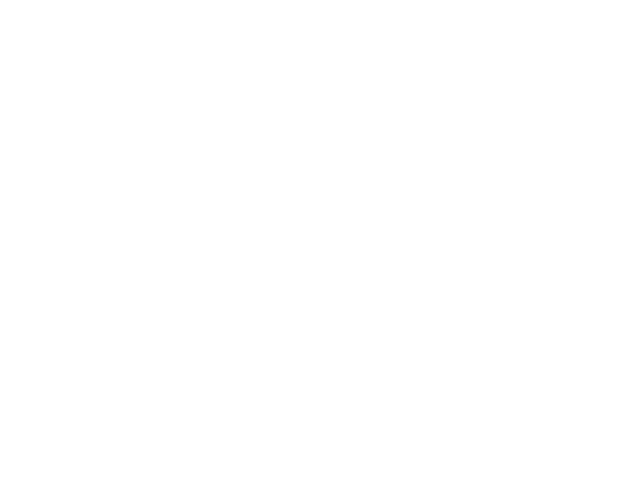

In [4]:
histoAndFitPoisson(dt)

0 2.103571428571428 0.0 0.0


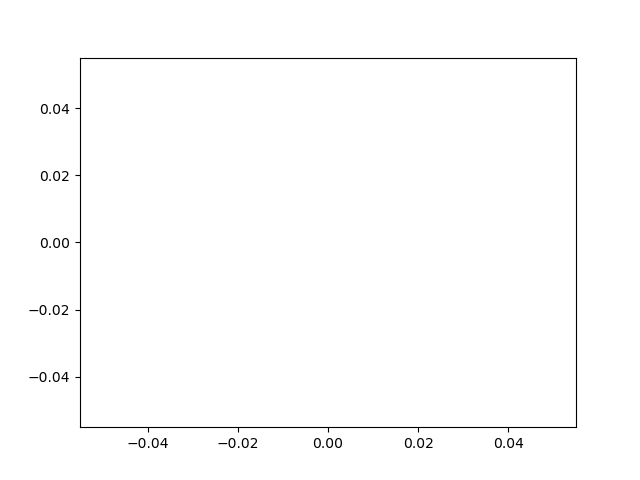

In [5]:
from scipy.stats import binom
mean=0
std=2.103571428571428
if(pow(std,2) > mean):
    p=mean/pow(std,2)
    n=pow(mean,2)/(pow(std,2)-mean)
    print(mean, std, p, n)
    x = np.arange(np.min(dt), np.max(dt))
    y = nbinom.pmf(x, n = n, p = p)
else:
    p=1-pow(std,2)/mean
    n=mean/p
    print(mean, std, p, n)
    x = np.arange(np.min(dt), np.max(dt))
    y = binom.pmf(x, n = n, p = p)

# n= 1
# p= 0.24786072587784008
x=np.arange(0, 50)
y = 1*nbinom.pmf(x, n = n, p = p) #+ nbinom.pmf(x, n=10, p=0.8)
plt.clf()
plt.plot(x, y)
plt.show()

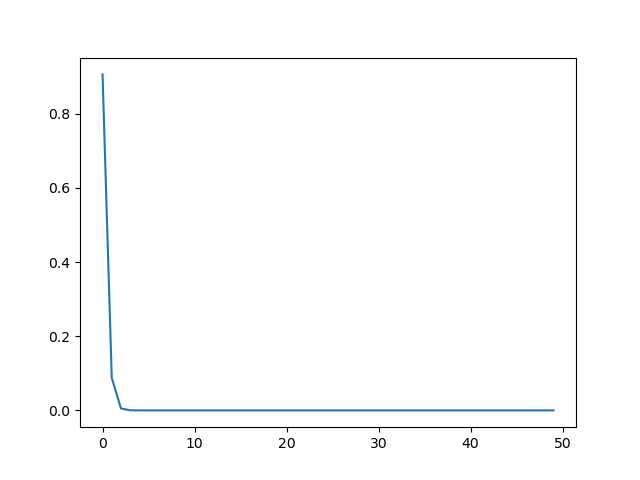

In [8]:
from scipy.stats import binom
from scipy.stats import nbinom
n= 4.4601930614099965
p= 0.9782118426033699
x=np.arange(0, 50)
y = 1*binom.pmf(x, n = n, p = p)
ny = 1*nbinom.pmf(x, n = n, p = p)
plt.clf()
# plt.plot(x, y)
plt.plot(x, ny)
plt.show()

In [48]:
x=21892
n= 3357
p= 0.13588935599710122
nbinom.pmf(x, n = n, p = p)

0.00038753773085658806

In [46]:
x=21892
n= 3357.798621492703
p= 0.13588935599710122
pow(p, x) * pow(1 - p, n - x)

-18534.201378507296

OverflowError: (34, 'Numerical result out of range')

In [250]:
mean= 0
var= 2.1
if(var > mean):
    p=mean/var
    n=pow(mean,2)/(var-mean)
else:
    p=1-var/mean
    n=mean/p
print(mean, std, p, n)

0 12.103571428571428 0.0 0.0


In [224]:
-np.log(1-0.999999999)/np.log(10)

9.000000012282685

In [158]:

# mean=np.mean(dt)
# std=np.std(dt)
mean=20000
stddev=150
std=pow(stddev,2)
p=mean/std
n=pow(mean,2)/(std-mean)
print(mean,std,p,n)
p=1-mean/std
n=mean*(1-p)/p
print(mean,std,p,n)

20000 22500 0.8888888888888888 160000.0
20000 22500 0.11111111111111116 159999.9999999999
